<a href="https://colab.research.google.com/github/SanghunOh/study_machinglearning/blob/main/codes/yanginsuk/02_%ED%8C%A8%ED%84%B4%EC%9D%B8%EC%8B%9D%EA%B8%B0_2%EC%B0%A8%EC%9B%90%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
np.random.seed(50)  # 동일한 수열 발생 위해 설정
row_count = 50
# row_count = 1000

In [3]:
mean_1 = np.array([3,5])
mean_1, mean_1.shape, type(mean_1)

(array([3, 5]), (2,), numpy.ndarray)

In [4]:
# sigma_1 = np.array([[1,1],[1,2]])
sigma_1 = np.array([[3,1],[1,4]])   # 식별 위해 값 분포 임의 폭 증가
sigma_1, sigma_1.shape, type(sigma_1)

(array([[3, 1],
        [1, 4]]), (2, 2), numpy.ndarray)

In [5]:
rand_std_1 = np.random.randn(row_count, 2)
# rand_std_1, 
rand_std_1.shape, type(rand_std_1)

((50, 2), numpy.ndarray)

In [6]:
class_A = rand_std_1 @ np.sqrt(sigma_1) + mean_1 # 공분산 적용 분포 구하기

In [7]:
mean_2 = np.array([5,3])
# sigma_2 = np.array([[1,1],[1,2]])
sigma_2 = np.array([[3,1],[1,4]])   # 식별 위해 값 분포 임의 폭 증가
rand_std_2 = np.random.randn(row_count, 2)
class_B = rand_std_2 @ np.sqrt(sigma_2) + mean_2
class_B.shape

(50, 2)

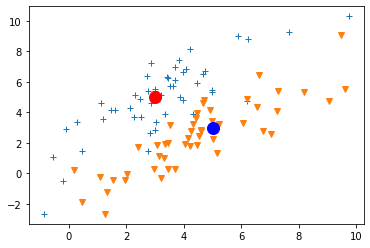

In [9]:
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
plt.plot(class_A[:,0],class_A[:,1],marker='+',linestyle='None') # 데이터 A
plt.plot(mean_1[0],mean_1[1],'o',ls='None', color='red', markersize=12) # 데이터 A 평균
plt.plot(class_B[:,0],class_B[:,1],'v')  # 데이터 B
plt.plot(mean_2[0],mean_2[1],'o',color='blue', ms=12)  # 데이터 B 평균
# plt.plot(range(11)) # 예상할 수 있는 선형 경계

In [10]:
class_A_mean = np.mean(class_A,axis=0)
class_A_cov = np.cov(class_A.T)
class_A_mean, class_A_cov

(array([3.20902787, 4.98402174]), array([[3.96764102, 3.83332394],
        [3.83332394, 5.72462042]]))

In [11]:
class_B_mean = np.mean(class_B,axis=0)
class_B_cov = np.cov(class_B.T)
class_A_mean, class_A_cov

(array([3.20902787, 4.98402174]), array([[3.96764102, 3.83332394],
        [3.83332394, 5.72462042]]))

In [12]:
# 예측할려고 하는 새로운 값
new_data_02 = np.array([3,1])
new_data_02, type(new_data_02), new_data_02.shape, new_data_02[0],new_data_02[1],

(array([3, 1]), numpy.ndarray, (2,), 3, 1)

In [13]:
# 예측할려고 하는 새로운 값
new_data_01 = np.array([8,9])
new_data_01, type(new_data_01), new_data_01.shape, new_data_01[0],new_data_01[1]

(array([8, 9]), numpy.ndarray, (2,), 8, 9)

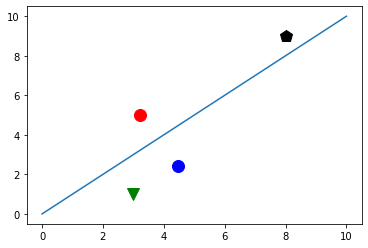

In [14]:
plt.plot(range(11))
plt.plot(class_A_mean[0],class_A_mean[1],'o',color='red', ms=12)  # 데이터 A 평균
plt.plot(class_B_mean[0],class_B_mean[1],'o',color='blue', ms=12)  # 데이터 B 평균
plt.plot(new_data_01[0],new_data_01[1],'p',color='black', ms=12)  # 데이터 A 평균
plt.plot(new_data_02[0],new_data_02[1],'v',color='green', ms=12)  # 데이터 B 평균
plt.show()

In [15]:
np.linalg.norm(new_data_01-class_B_mean) - np.linalg.norm(new_data_01-class_A_mean) # class A

1.2173067711404641

In [16]:
np.linalg.norm(new_data_02-class_B_mean) - np.linalg.norm(new_data_02-class_A_mean) # class B

-1.952180179204856

In [17]:
first = np.sqrt(np.matmul((new_data_01 - class_B_mean).T, (new_data_01 - class_B_mean)))
first, type(first), first.shape

(7.468826216538792, numpy.float64, ())

In [18]:
second = np.sqrt(np.matmul((new_data_01 - class_A_mean).T, (new_data_01 - class_A_mean)))
second, type(second), second.shape

(6.251519445398328, numpy.float64, ())

In [19]:
result = second - first   # class A
result

-1.2173067711404641

In [20]:
first = np.sqrt(np.matmul((new_data_02 - class_B_mean).T, (new_data_02 - class_B_mean)))
first, type(first), first.shape

(2.037321276064938, numpy.float64, ())

In [21]:
second = np.sqrt(np.matmul((new_data_02 - class_A_mean).T, (new_data_02 - class_A_mean)))
second, type(second), second.shape

(3.989501455269794, numpy.float64, ())

In [22]:
result = second - first   # class B
result

1.952180179204856

In [23]:
class_A_error_count, class_B_error_count = 0, 0
for idx in range(row_count):
  distance_A = np.linalg.norm(class_A[idx] - class_A_mean) - np.linalg.norm(class_A[idx] - class_B_mean)
  if distance_A > 0 :
    class_A_error_count += 1
  distance_B = np.linalg.norm(class_B[idx] - class_A_mean) - np.linalg.norm(class_B[idx] - class_B_mean)
  if distance_B < 0 :
    class_B_error_count += 1    

(class_A_error_count + class_B_error_count) / row_count, class_A_error_count, class_B_error_count

(0.28, 9, 5)